In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('season.csv', sep=';')
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [3]:
months = df.drop(['Названия строк'],axis='columns')

for month in months:
    months[month] = months[month].apply(lambda x: int(x.replace(' ', '')))
months

,1,2,3,4,5,6,7,8,9,10,11,12
0,131781,193702,219058,253611,206774,269573,310051,325971,274452,273714,254522,324203
1,70864,91582,116243,132050,141420,144101,132657,149012,170969,165903,170634,185597
2,41305,61149,74848,82870,69858,79830,72564,98964,94455,104170,122002,136775
3,37262,45718,56688,65157,58646,64470,76919,84881,75728,77139,85565,87466
4,36301,41508,72629,81066,83110,90222,99912,82794,53273,54593,52882,31699
...,...,...,...,...,...,...,...,...,...,...,...,...
833,3,16,8,6,16,5,12,7,10,6,7,17
834,1,4,7,17,10,16,7,12,13,6,6,4
835,4,2,10,6,3,4,8,6,2,6,36,9
836,4,6,6,18,4,1,3,7,18,8,7,5


In [4]:
mean = []
for month in months.values:
    mean.append(month.mean())
mean[:2]

[253117.66666666666, 139252.66666666666]

In [5]:
co = 0 
for month in months.values:
    months.loc[co] = ((pd.Series(month) / mean[co]).values)
    co+=1
    
months

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.520631,0.765265,0.865439,1.001949,0.816909,1.065011,1.224928,1.287824,1.084286,1.081371,1.005548,1.280839
1,0.508888,0.657668,0.834763,0.948276,1.015564,1.034817,0.952635,1.070084,1.227761,1.191381,1.225355,1.332808
2,0.477151,0.706387,0.864637,0.957306,0.806993,0.922188,0.838252,1.143222,1.091135,1.203362,1.409355,1.580011
3,0.548213,0.672621,0.834016,0.958615,0.862823,0.948508,1.131662,1.248802,1.114140,1.134899,1.258866,1.286834
4,0.558485,0.638594,1.117385,1.247187,1.278633,1.388050,1.537129,1.273772,0.819596,0.839904,0.813581,0.487684
...,...,...,...,...,...,...,...,...,...,...,...,...
833,0.318584,1.699115,0.849558,0.637168,1.699115,0.530973,1.274336,0.743363,1.061947,0.637168,0.743363,1.805310
834,0.116505,0.466019,0.815534,1.980583,1.165049,1.864078,0.815534,1.398058,1.514563,0.699029,0.699029,0.466019
835,0.500000,0.250000,1.250000,0.750000,0.375000,0.500000,1.000000,0.750000,0.250000,0.750000,4.500000,1.125000
836,0.551724,0.827586,0.827586,2.482759,0.551724,0.137931,0.413793,0.965517,2.482759,1.103448,0.965517,0.689655


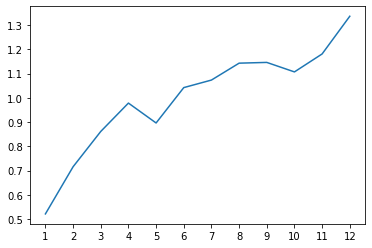

1     0.521045
2     0.715555
3     0.861202
4     0.978189
5     0.896117
6     1.042030
7     1.073123
8     1.142833
9     1.145942
10    1.106778
11    1.180833
12    1.336354
dtype: float64

In [6]:
mean_grow = months.mean()

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot((mean_grow.index), (mean_grow.values))
plt.show()
mean_grow

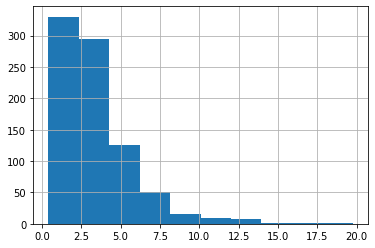

In [7]:
residual_sum = (months - mean_grow).abs().T.sum()
residual_sum.hist();

In [8]:
residual_sum.name = 'residual_sum'
residual_sum.name

'residual_sum'

In [9]:
mean = pd.Series(mean)
mean.name = 'mean'

temp_df = pd.merge(residual_sum, pd.Series(mean), right_index = True,
               left_index = True)
df = pd.concat([temp_df,df['Названия строк']],axis=1)
df

,residual_sum,mean,Названия строк
0,0.794970,253117.666667,11F95FD8-532E-11E6-B059-005056A2384C
1,0.660783,139252.666667,96597DFB-6816-11E5-B1B7-00505602071E
2,1.145174,86565.833333,00000000-0000-0000-0000-000000676452
3,0.595662,67969.916667,7E5A52EA-158E-11E5-9252-0050560205C4
4,3.772207,64999.083333,00000000-0000-0000-0000-000000000000
...,...,...,...
833,4.913454,9.416667,00000000-0000-0000-0000-000316264460
834,5.434439,8.583333,B5F6F317-CE8A-11E7-861D-005056A225F3
835,7.415930,8.000000,16E87AC4-EB03-11E7-9EA6-005056A225F3
836,5.968195,7.250000,00000000-0000-0000-0000-000152629305


# Инсайт

Есть повторяющиеся поставщики в разных разделах. Например макита одновременно есть в товарах для сада и инструменте.

- Быстрое решение - посчитать среднее по повторяющимся поставщикам.

In [10]:
enough_big = df[(df['mean']>1000) & (df['Названия строк'].isin( mono_shipper))]
pd.set_option('display.max_rows', None)

enough_big.sort_values(by='residual_sum', ascending=False)

NameError: name 'mono_shipper' is not defined